In [1]:
import os
%pip install ipywidgets matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
image_folder = '../images'  
output_folder = '../labeled_dataset' 

In [3]:
growth_stages = ['Vegetative', 'Flowering','Immature','Mature-HarvestReady']

In [4]:
os.makedirs(output_folder, exist_ok=True)
for stage in growth_stages:
    os.makedirs(os.path.join(output_folder, stage), exist_ok=True)

In [5]:
images = [img for img in os.listdir(image_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
if not images:
    print("No images found in the folder. Please add some images to the 'images' folder.")
    raise SystemExit

In [6]:
current_image_index = 0

In [7]:
def label_image(label):
    global current_image_index
    image_name = images[current_image_index]
    source_path = os.path.join(image_folder, image_name)
    dest_path = os.path.join(output_folder, label, image_name)
    os.rename(source_path, dest_path)
    current_image_index += 1
    if current_image_index < len(images):
        update_image() 
    else:
        print("All images have been labeled.")
        plt.close() 

In [8]:
def update_image():
    clear_output(wait=True)  
    img = plt.imread(os.path.join(image_folder, images[current_image_index]))
    plt.imshow(img)
    plt.title('Label the Image')
    plt.axis('off')
    create_buttons()  
    display(plt.gcf()) 

In [9]:
def create_buttons():
    button_widgets = []
    for i, stage in enumerate(growth_stages):
        button = widgets.Button(description=stage, layout=widgets.Layout(width="150px", height="40px"))
        button.on_click(lambda _, l=stage: label_image(l)) 
        button_widgets.append(button)
    
    button_box = widgets.HBox(button_widgets)
    display(button_box)

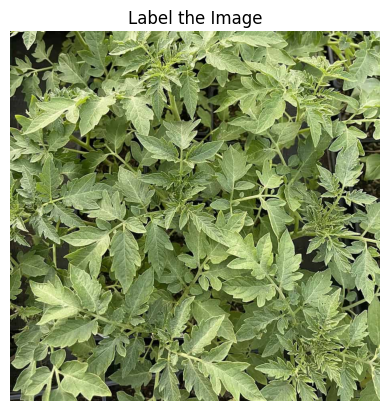

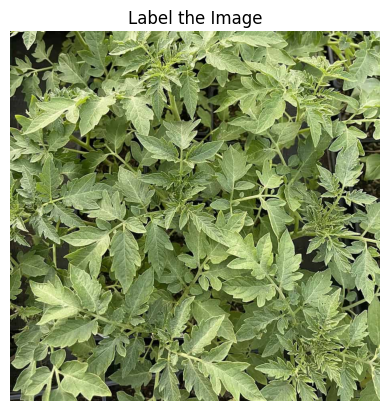

All images have been labeled.


In [10]:
update_image() 